In [2]:
# Importing all relevant libraries/packages

import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx 
import osmnx as ox
import pandas as pd
from pyproj import CRS

In [3]:
# Place Names to Geocode along with point coordinate

place_name = "Kumasi Metropolitan District"
place_name1 = "Tema, Greater Accra Region, Ghana"
place_name2 = "Accra, Ghana" 
place_name3 = "Sekondi Takoradi Metropolitan District"
place_name4 = "Cape Coast Metropolitan District"
place_name5 = "Tamale Metropolitan District"
place_name6 = "Tarkwa-Nsuaem Municipal District"
place_name7 = "Ho Municipal District"
place_name8 = "Bawku Municipal District"
place_name9 = "Bolgatanga Municipal District"
place_name10 = "Wa Municipal District"
place_name11 = "Sunyani Municipal District"
place_name12 = "Techiman Municipal District"
place_name13 = "Krachi East District"
place_name14 = "East Mamprusi Municipal District"
place_name15 = "West Gonja Municipal District"
point_coord16 = (6.100334,-0.2614572) 

In [4]:
# Graphing Street Network from Open Street Map Nominatim API

graph = ox.graph_from_place(place_name, network_type='drive')
type(graph)

networkx.classes.multidigraph.MultiDiGraph

In [5]:
graph1 = ox.graph_from_place(place_name1, network_type='drive')
type(graph1)

networkx.classes.multidigraph.MultiDiGraph

In [6]:
graph2 = ox.graph_from_place(place_name2, network_type='drive')
type(graph2)

networkx.classes.multidigraph.MultiDiGraph

In [7]:
graph3 = ox.graph_from_place(place_name3)
type(graph3)

networkx.classes.multidigraph.MultiDiGraph

In [8]:
graph4 = ox.graph_from_place(place_name4)
type(graph4)

networkx.classes.multidigraph.MultiDiGraph

In [9]:
graph5 = ox.graph_from_place(place_name5)
type(graph5)

networkx.classes.multidigraph.MultiDiGraph

In [10]:
graph6 = ox.graph_from_place(place_name6)
type(graph6)

networkx.classes.multidigraph.MultiDiGraph

In [11]:
graph7 = ox.graph_from_place(place_name7)
type(graph7)

networkx.classes.multidigraph.MultiDiGraph

In [12]:
graph8 = ox.graph_from_place(place_name8)
type(graph8)

networkx.classes.multidigraph.MultiDiGraph

In [13]:
graph9 = ox.graph_from_place(place_name9)
type(graph9)

networkx.classes.multidigraph.MultiDiGraph

In [14]:
graph10 = ox.graph_from_place(place_name10)
type(graph10)

networkx.classes.multidigraph.MultiDiGraph

In [15]:
graph11 = ox.graph_from_place(place_name11)
type(graph11)

networkx.classes.multidigraph.MultiDiGraph

In [16]:
graph12 = ox.graph_from_place(place_name12)
type(graph12)

networkx.classes.multidigraph.MultiDiGraph

In [17]:
graph13 = ox.graph_from_place(place_name13)
type(graph13)

networkx.classes.multidigraph.MultiDiGraph

In [18]:
graph14 = ox.graph_from_place(place_name14)
type(graph14)

networkx.classes.multidigraph.MultiDiGraph

In [19]:
graph15 = ox.graph_from_place(place_name15)
type(graph15)

networkx.classes.multidigraph.MultiDiGraph

In [20]:
graph16 = ox.graph_from_point(point_coord16, dist=5000)
type(graph16)

networkx.classes.multidigraph.MultiDiGraph

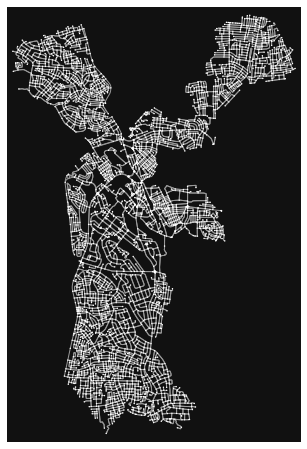

In [22]:
# Plotting Graphed Street Network

fig, ax = ox.plot_graph(graph, node_size=2)

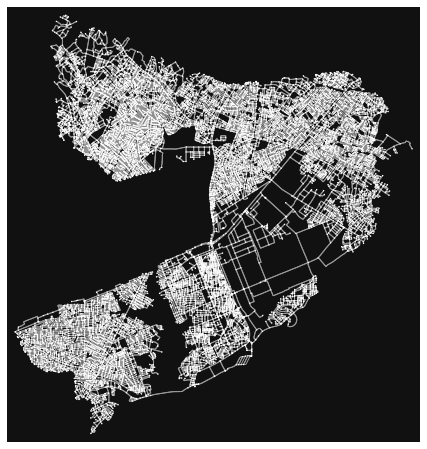

In [23]:
fig, ax = ox.plot_graph(graph1, node_size=2)

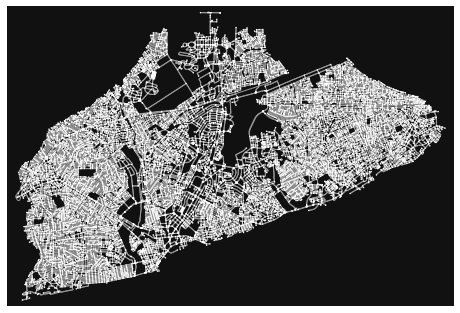

In [24]:
fig, ax = ox.plot_graph(graph2, node_size=2)

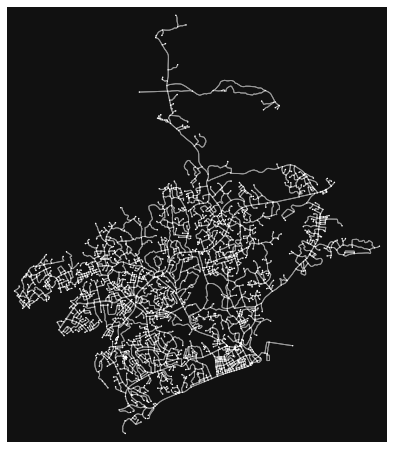

In [25]:
fig, ax = ox.plot_graph(graph3, node_size=2)

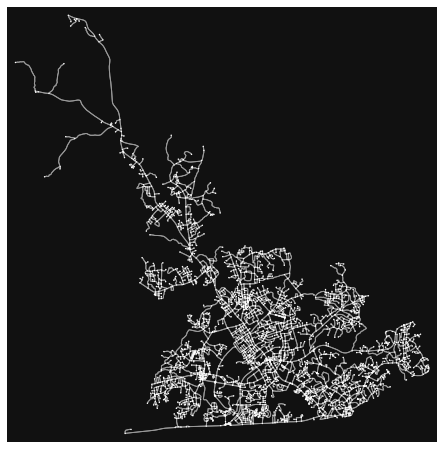

In [26]:
fig, ax = ox.plot_graph(graph4, node_size=2)

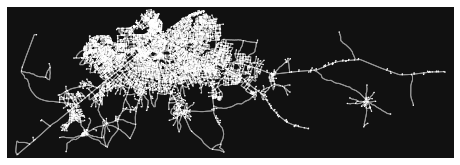

In [27]:
fig, ax = ox.plot_graph(graph5, node_size=2)

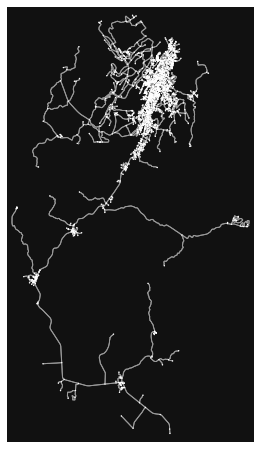

In [28]:
fig, ax = ox.plot_graph(graph6, node_size=2)

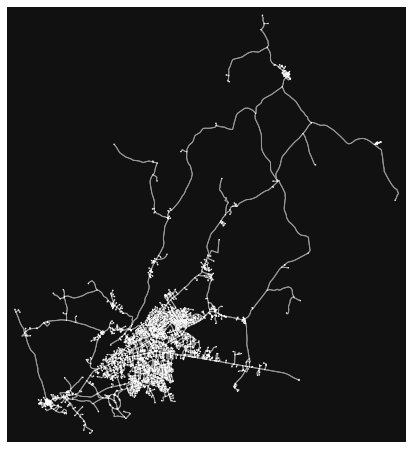

In [29]:
fig, ax = ox.plot_graph(graph7, node_size=2)

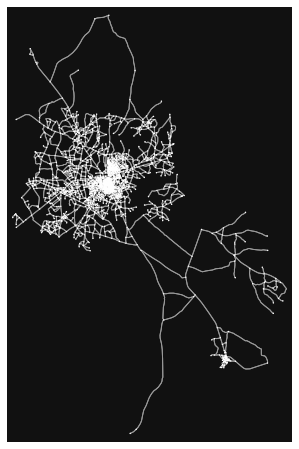

In [30]:
fig, ax = ox.plot_graph(graph8, node_size=2)

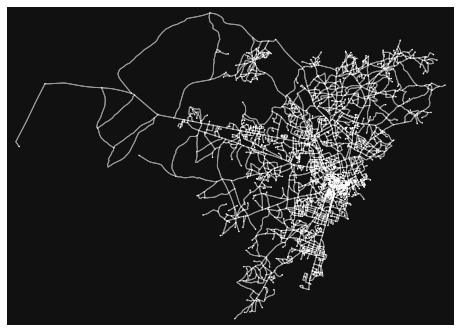

In [31]:
fig, ax = ox.plot_graph(graph9, node_size=2)

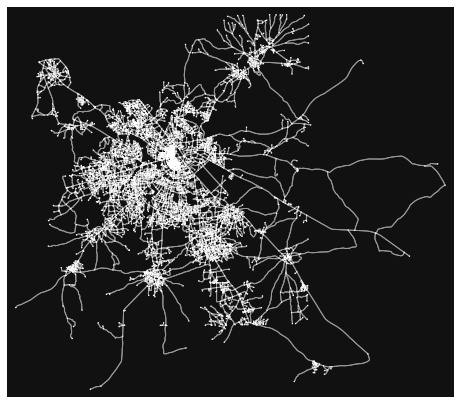

In [32]:
fig, ax = ox.plot_graph(graph10,node_size=2)

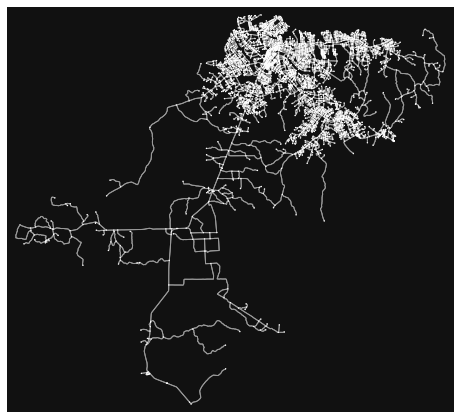

In [33]:
fig, ax = ox.plot_graph(graph11, node_size=2)

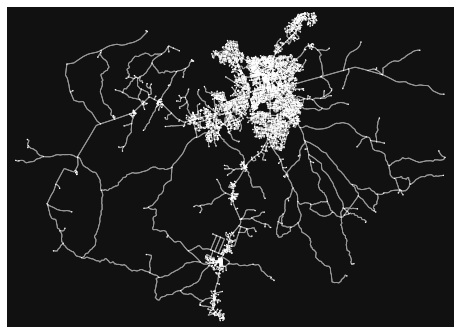

In [34]:
fig, ax = ox.plot_graph(graph12, node_size=2)

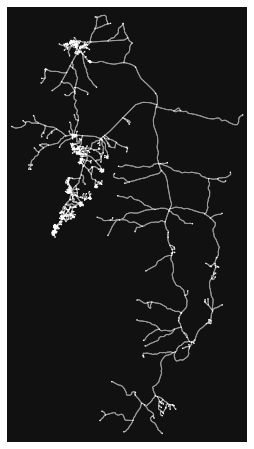

In [35]:
fig, ax = ox.plot_graph(graph13, node_size=2)

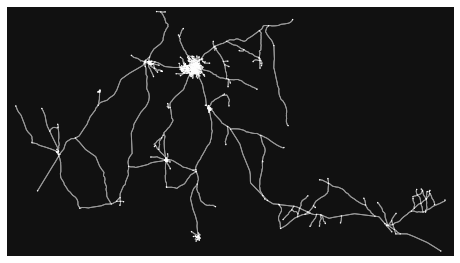

In [36]:
fig, ax = ox.plot_graph(graph14, node_size=2)

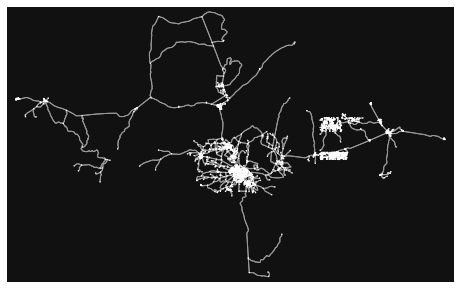

In [37]:
fig, ax = ox.plot_graph(graph15, node_size=2)

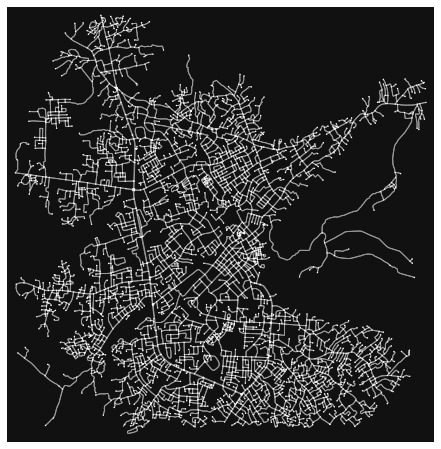

In [38]:
fig, ax = ox.plot_graph(graph16, node_size=2)

Coordinate system: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


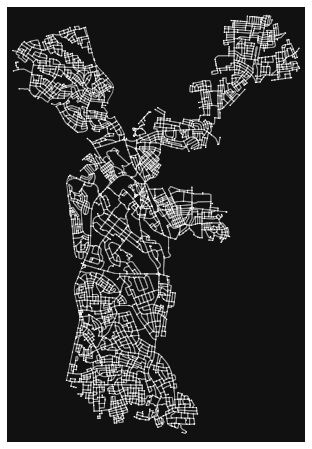

In [40]:
# Project Graphed Street Network to UTM 30
graph_proj_ksi = ox.project_graph(graph)

# Transform graph to geodataframe
nodes_proj_ksi, edges_proj_ksi = ox.graph_to_gdfs(graph_proj_ksi, nodes=True, edges=True)
print("Coordinate system:", edges_proj_ksi.crs)

# Simplify and Consolidate Nodes in the Graphed Street Network
simplified_graph_ksi = ox.consolidate_intersections(graph_proj_ksi, tolerance=10, rebuild_graph=True)

# Plot
fig, ax = ox.plot_graph(simplified_graph_ksi, node_size=2)

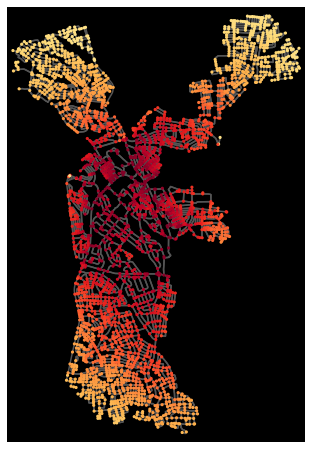

In [86]:

# node closeness centrality
node_centrality_ksi = nx.closeness_centrality(simplified_graph_ksi)

# plot 
df = pd.DataFrame(data=pd.Series(node_centrality_ksi).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='YlOrRd', start=0.2)
df = df.reindex(simplified_graph_ksi.nodes())
nc = df['colors'].tolist()


fp = "centralityksi1.png"
fig, ax = ox.plot_graph(simplified_graph_ksi, bgcolor='k', node_size=10, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, save=True, filepath=fp, dpi=300)

Coordinate system: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


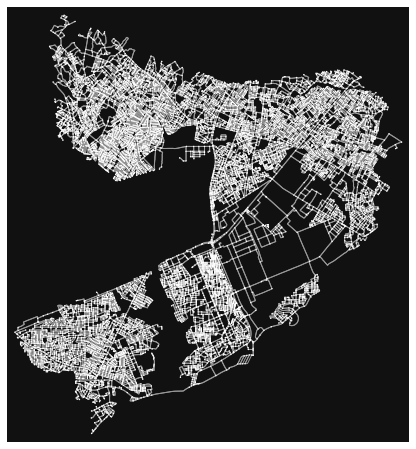

In [41]:
# Project Graphed Street Network to UTM 30
graph_proj_tema = ox.project_graph(graph1)

# Transform graph to geodataframe
nodes_proj_tema, edges_proj_tema = ox.graph_to_gdfs(graph_proj_tema, nodes=True, edges=True)
print("Coordinate system:", edges_proj_tema.crs)

# Simplify and Consolidate Nodes in the Graphed Street Network
simplified_graph_tema = ox.consolidate_intersections(graph_proj_tema, tolerance=10, rebuild_graph=True)

# Plot
fig, ax = ox.plot_graph(simplified_graph_tema, node_size=2)

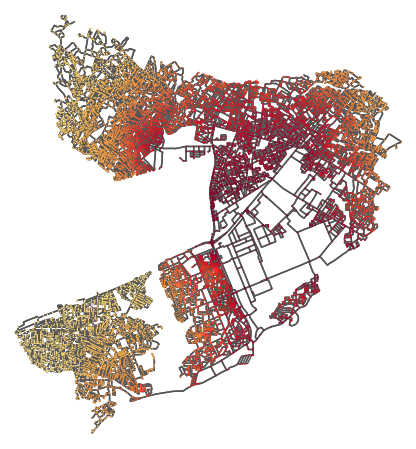

In [88]:
# node closeness centrality
node_centrality_tema = nx.closeness_centrality(simplified_graph_tema)

# plot 
df = pd.DataFrame(data=pd.Series(node_centrality_tema).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='YlOrRd', start=0.2)
df = df.reindex(simplified_graph_tema.nodes())
nc = df['colors'].tolist()

fp = "centralitytema.png"
fig, ax = ox.plot_graph(simplified_graph_tema, bgcolor='w', node_size=2, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, save=True, filepath=fp, dpi=300)

Coordinate system: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


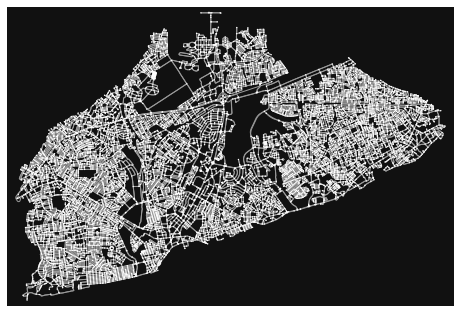

In [42]:
# Project Graphed Street Network to UTM 30
graph_proj_accra = ox.project_graph(graph2)

# Transform graph to geodataframe
nodes_proj_accra, edges_proj_accra = ox.graph_to_gdfs(graph_proj_accra, nodes=True, edges=True)
print("Coordinate system:", edges_proj_accra.crs)

# Simplify and Consolidate Nodes in the Graphed Street Network
simplified_graph_accra = ox.consolidate_intersections(graph_proj_accra, tolerance=10, rebuild_graph=True)

# Plot
fig, ax = ox.plot_graph(simplified_graph_accra, node_size=2)

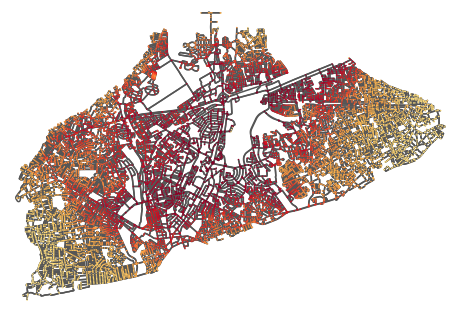

In [90]:
# node closeness centrality
node_centrality_accra = nx.closeness_centrality(simplified_graph_accra)

# plot 
df = pd.DataFrame(data=pd.Series(node_centrality_accra).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='YlOrRd', start=0.2)
df = df.reindex(simplified_graph_accra.nodes())
nc = df['colors'].tolist()

fp = "centralityaccra.png"
fig, ax = ox.plot_graph(simplified_graph_accra, bgcolor='w', node_size=2, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, save=True, filepath=fp, dpi=300)

Coordinate system: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


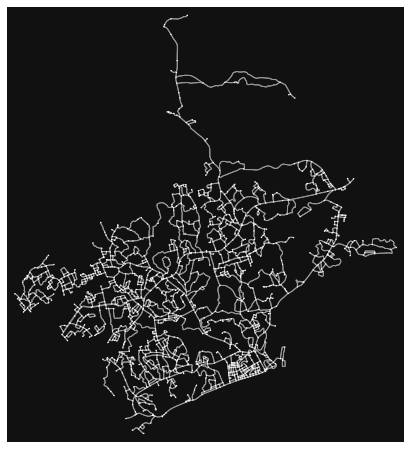

In [43]:
# Project Graphed Street Network to UTM 30
graph_proj_tadi = ox.project_graph(graph3)

# Transform graph to geodataframe
nodes_proj_tadi, edges_proj_tadi = ox.graph_to_gdfs(graph_proj_tadi, nodes=True, edges=True)
print("Coordinate system:", edges_proj_tadi.crs)

# Simplify and Consolidate Nodes in the Graphed Street Network
simplified_graph_tadi = ox.consolidate_intersections(graph_proj_tadi, tolerance=10, rebuild_graph=True)

# Plot
fig, ax = ox.plot_graph(simplified_graph_tadi, node_size=2)

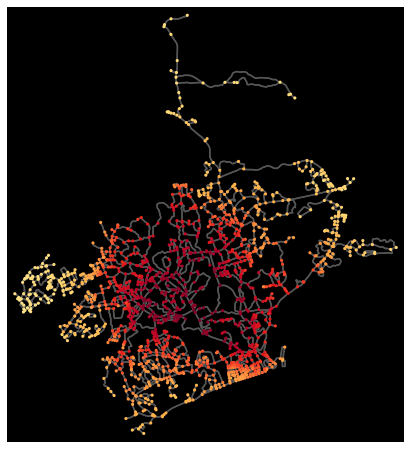

In [92]:
# node closeness centrality
node_centrality_tadi = nx.closeness_centrality(simplified_graph_tadi)

# plot 
df = pd.DataFrame(data=pd.Series(node_centrality_tadi).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='YlOrRd', start=0.2)
df = df.reindex(simplified_graph_tadi.nodes())
nc = df['colors'].tolist()

fp = "centralitytadi1.png"
fig, ax = ox.plot_graph(simplified_graph_tadi, bgcolor='k', node_size=10, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, save=True, filepath=fp, dpi=300)

Coordinate system: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


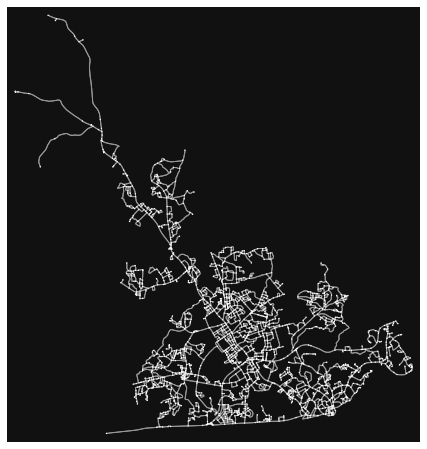

In [44]:
# Project Graphed Street Network to UTM 30
graph_proj_cape = ox.project_graph(graph4)

# Transform graph to geodataframe
nodes_proj_cape, edges_proj_cape = ox.graph_to_gdfs(graph_proj_cape, nodes=True, edges=True)
print("Coordinate system:", edges_proj_cape.crs)

# Simplify and Consolidate Nodes in the Graphed Street Network
simplified_graph_cape = ox.consolidate_intersections(graph_proj_cape, tolerance=10, rebuild_graph=True)

# Plot
fig, ax = ox.plot_graph(simplified_graph_cape, node_size=2)

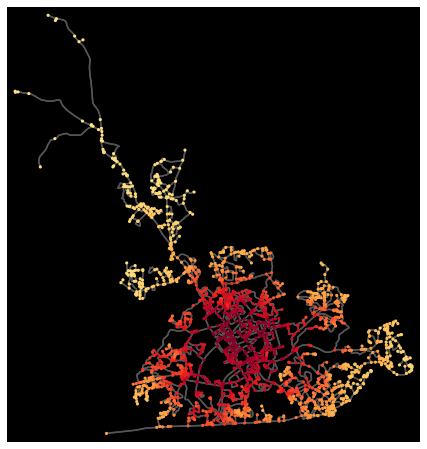

In [93]:
# node closeness centrality
node_centrality_cape = nx.closeness_centrality(simplified_graph_cape)

# plot 
df = pd.DataFrame(data=pd.Series(node_centrality_cape).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='YlOrRd', start=0.2)
df = df.reindex(simplified_graph_cape.nodes())
nc = df['colors'].tolist()

fp = "centralitycape1.png"
fig, ax = ox.plot_graph(simplified_graph_cape, bgcolor='k', node_size=10, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, save=True, filepath=fp, dpi=300)

Coordinate system: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


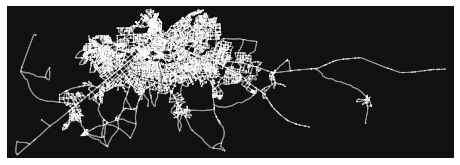

In [45]:
# Project Graphed Street Network to UTM 30
graph_proj_tamale = ox.project_graph(graph5)

# Transform graph to geodataframe
nodes_proj_tamale, edges_proj_tamale = ox.graph_to_gdfs(graph_proj_tamale, nodes=True, edges=True)
print("Coordinate system:", edges_proj_tamale.crs)

# Simplify and Consolidate Nodes in the Graphed Street Network
simplified_graph_tamale = ox.consolidate_intersections(graph_proj_tamale, tolerance=10, rebuild_graph=True)

# Plot
fig, ax = ox.plot_graph(simplified_graph_tamale, node_size=2)

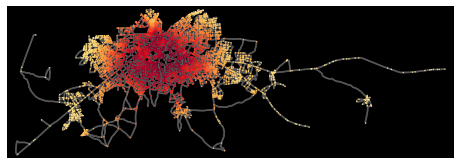

In [94]:
# node closeness centrality
node_centrality_tamale = nx.closeness_centrality(simplified_graph_tamale)

# plot 
df = pd.DataFrame(data=pd.Series(node_centrality_tamale).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='YlOrRd', start=0.2)
df = df.reindex(simplified_graph_tamale.nodes())
nc = df['colors'].tolist()

fp = "centralitytamale1.png"
fig, ax = ox.plot_graph(simplified_graph_tamale, bgcolor='k', node_size=2, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, save=True, filepath=fp, dpi=300)

Coordinate system: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


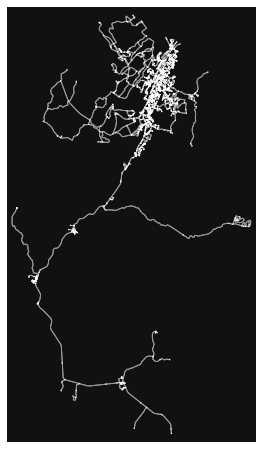

In [46]:
# Project Graphed Street Network to UTM 30
graph_proj_tarkwa = ox.project_graph(graph6)

# Transform graph to geodataframe
nodes_proj_tarkwa, edges_proj_tarkwa = ox.graph_to_gdfs(graph_proj_tarkwa, nodes=True, edges=True)
print("Coordinate system:", edges_proj_tarkwa.crs)

# Simplify and Consolidate Nodes in the Graphed Street Network
simplified_graph_tarkwa = ox.consolidate_intersections(graph_proj_tarkwa, tolerance=10, rebuild_graph=True)

# Plot
fig, ax = ox.plot_graph(simplified_graph_tarkwa, node_size=2)

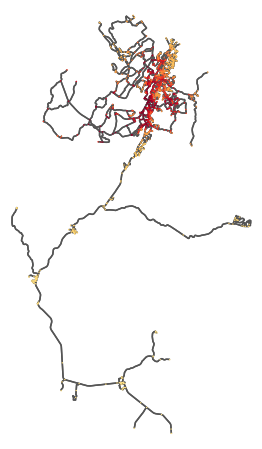

In [98]:
# node closeness centrality
node_centrality_tarkwa = nx.closeness_centrality(simplified_graph_tarkwa)

# plot 
df = pd.DataFrame(data=pd.Series(node_centrality_tarkwa).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='YlOrRd', start=0.2)
df = df.reindex(simplified_graph_tarkwa.nodes())
nc = df['colors'].tolist()


fp = "centralitytarkwa.png"
fig, ax = ox.plot_graph(simplified_graph_tarkwa, bgcolor='w', node_size=2, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, save=True, filepath=fp, dpi=300)

Coordinate system: +proj=utm +zone=31 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


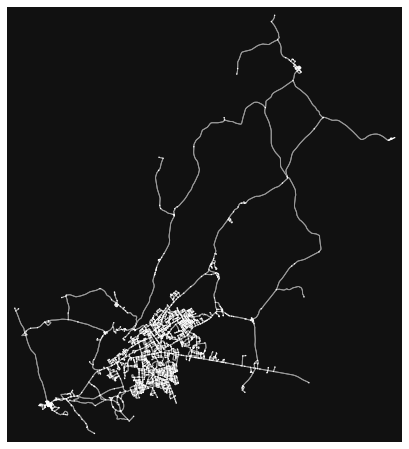

In [47]:
# Project Graphed Street Network to UTM 30
graph_proj_ho = ox.project_graph(graph7)

# Transform graph to geodataframe
nodes_proj_ho, edges_proj_ho = ox.graph_to_gdfs(graph_proj_ho, nodes=True, edges=True)
print("Coordinate system:", edges_proj_ho.crs)

# Simplify and Consolidate Nodes in the Graphed Street Network
simplified_graph_ho = ox.consolidate_intersections(graph_proj_ho, tolerance=10, rebuild_graph=True)

# Plot
fig, ax = ox.plot_graph(simplified_graph_ho, node_size=2)

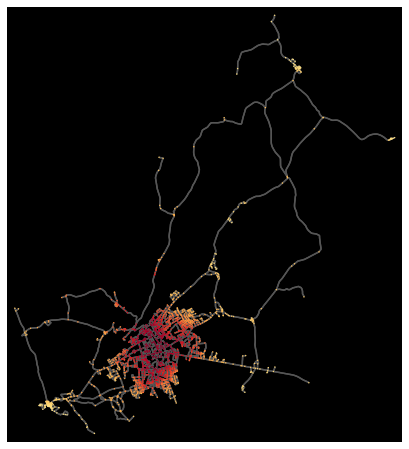

In [100]:
# node closeness centrality
node_centrality_ho = nx.closeness_centrality(simplified_graph_ho)

# plot 
df = pd.DataFrame(data=pd.Series(node_centrality_ho).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='YlOrRd', start=0.2)
df = df.reindex(simplified_graph_ho.nodes())
nc = df['colors'].tolist()


fp = "centralityho1.png"
fig, ax = ox.plot_graph(simplified_graph_ho, bgcolor='k', node_size=2, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, save=True, filepath=fp, dpi=300)

Coordinate system: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


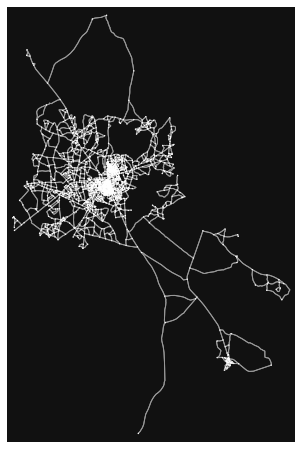

In [48]:
# Project Graphed Street Network to UTM 30
graph_proj_bawku = ox.project_graph(graph8)

# Transform graph to geodataframe
nodes_proj_bawku, edges_proj_bawku = ox.graph_to_gdfs(graph_proj_bawku, nodes=True, edges=True)
print("Coordinate system:", edges_proj_bawku.crs)

# Simplify and Consolidate Nodes in the Graphed Street Network
simplified_graph_bawku = ox.consolidate_intersections(graph_proj_bawku, tolerance=10, rebuild_graph=True)

# Plot
fig, ax = ox.plot_graph(simplified_graph_bawku, node_size=2)

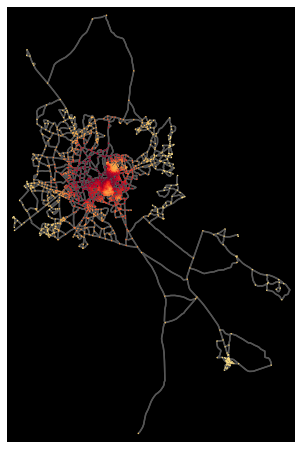

In [102]:
# node closeness centrality
node_centrality_bawku = nx.closeness_centrality(simplified_graph_bawku)

# plot 
df = pd.DataFrame(data=pd.Series(node_centrality_bawku).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='YlOrRd', start=0.2)
df = df.reindex(simplified_graph_bawku.nodes())
nc = df['colors'].tolist()


fp = "centralitybawku1.png"
fig, ax = ox.plot_graph(simplified_graph_bawku, bgcolor='k', node_size=2, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, save=True, filepath=fp, dpi=300)

Coordinate system: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


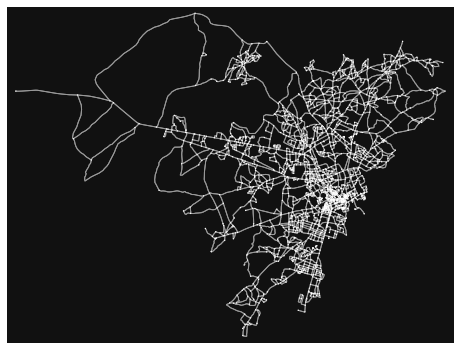

In [49]:
# Project Graphed Street Network to UTM 30
graph_proj_bolga = ox.project_graph(graph9)

# Transform graph to geodataframe
nodes_proj_bolga, edges_proj_bolga = ox.graph_to_gdfs(graph_proj_bolga, nodes=True, edges=True)
print("Coordinate system:", edges_proj_bolga.crs)

# Simplify and Consolidate Nodes in the Graphed Street Network
simplified_graph_bolga = ox.consolidate_intersections(graph_proj_bolga, tolerance=10, rebuild_graph=True)

# Plot
fig, ax = ox.plot_graph(simplified_graph_bolga, node_size=2)

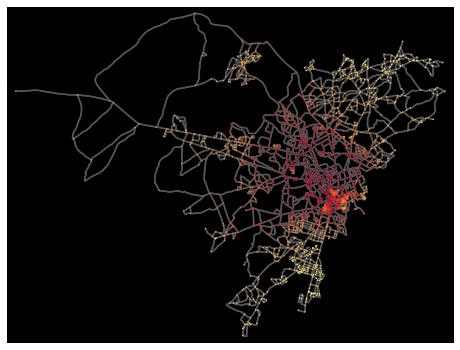

In [104]:
# node closeness centrality
node_centrality_bolga = nx.closeness_centrality(simplified_graph_bolga)

# plot 
df = pd.DataFrame(data=pd.Series(node_centrality_bolga).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='YlOrRd', start=0.2)
df = df.reindex(simplified_graph_bolga.nodes())
nc = df['colors'].tolist()


fp = "centralitybolga1.png"
fig, ax = ox.plot_graph(simplified_graph_bolga, bgcolor='k', node_size=2, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, save=True, filepath=fp, dpi=300)

Coordinate system: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


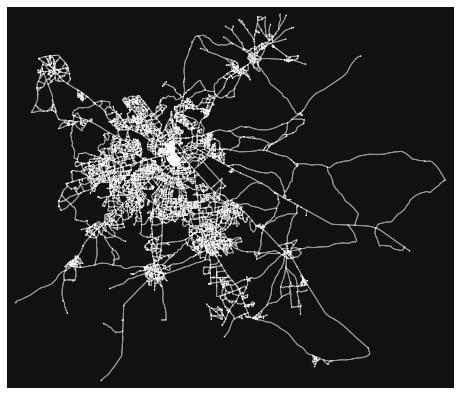

In [50]:
# Project Graphed Street Network to UTM 30
graph_proj_wa = ox.project_graph(graph10)

# Transform graph to geodataframe
nodes_proj_wa, edges_proj_wa = ox.graph_to_gdfs(graph_proj_wa, nodes=True, edges=True)
print("Coordinate system:", edges_proj_wa.crs)

# Simplify and Consolidate Nodes in the Graphed Street Network
simplified_graph_wa = ox.consolidate_intersections(graph_proj_wa, tolerance=10, rebuild_graph=True)

# Plot
fig, ax = ox.plot_graph(simplified_graph_wa, node_size=2)

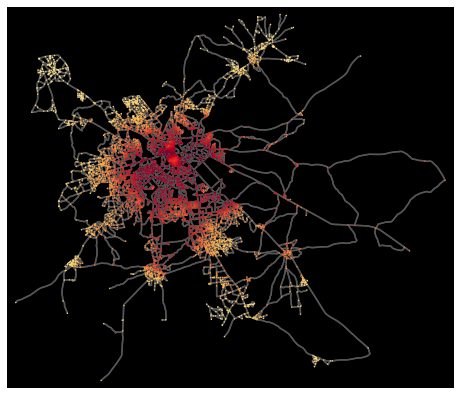

In [107]:
# node closeness centrality
node_centrality_wa = nx.closeness_centrality(simplified_graph_wa)

# plot 
df = pd.DataFrame(data=pd.Series(node_centrality_wa).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='YlOrRd', start=0.2)
df = df.reindex(simplified_graph_wa.nodes())
nc = df['colors'].tolist()


fp = "centralitywa1.png"
fig, ax = ox.plot_graph(simplified_graph_wa, bgcolor='k', node_size=2, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, save=True, filepath=fp, dpi=300)

Coordinate system: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


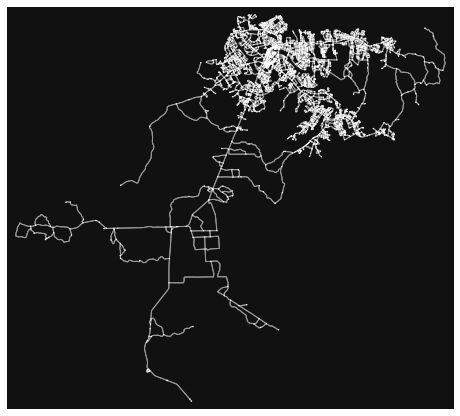

In [51]:
# Project Graphed Street Network to UTM 30
graph_proj_sunyani = ox.project_graph(graph11)

# Transform graph to geodataframe
nodes_proj_sunyani, edges_proj_sunyani = ox.graph_to_gdfs(graph_proj_sunyani, nodes=True, edges=True)
print("Coordinate system:", edges_proj_sunyani.crs)

# Simplify and Consolidate Nodes in the Graphed Street Network
simplified_graph_sunyani = ox.consolidate_intersections(graph_proj_sunyani, tolerance=10, rebuild_graph=True)

# Plot
fig, ax = ox.plot_graph(simplified_graph_sunyani, node_size=2)

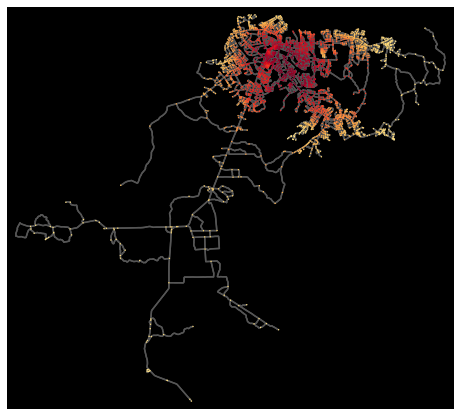

In [108]:
# node closeness centrality
node_centrality_sunyani = nx.closeness_centrality(simplified_graph_sunyani)

# plot 
df = pd.DataFrame(data=pd.Series(node_centrality_sunyani).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='YlOrRd', start=0.2)
df = df.reindex(simplified_graph_sunyani.nodes())
nc = df['colors'].tolist()

fp = "centralitysunyani1.png"
fig, ax = ox.plot_graph(simplified_graph_sunyani, bgcolor='k', node_size=2, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, save=True, filepath=fp, dpi=300)

Coordinate system: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


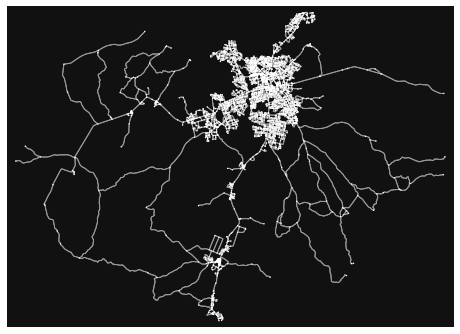

In [52]:
# Project Graphed Street Network to UTM 30
graph_proj_techiman = ox.project_graph(graph12)

# Transform graph to geodataframe
nodes_proj_techiman, edges_proj_techiman = ox.graph_to_gdfs(graph_proj_techiman, nodes=True, edges=True)
print("Coordinate system:", edges_proj_techiman.crs)

# Simplify and Consolidate Nodes in the Graphed Street Network
simplified_graph_techiman = ox.consolidate_intersections(graph_proj_techiman, tolerance=10, rebuild_graph=True)

# Plot
fig, ax = ox.plot_graph(simplified_graph_techiman, node_size=2)

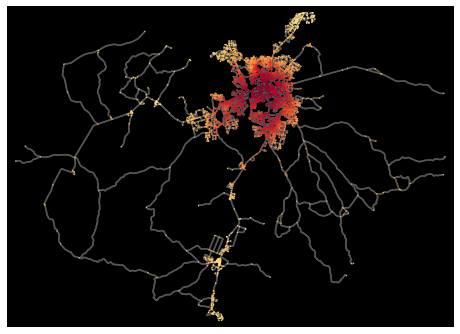

In [110]:
# node closeness centrality
node_centrality_techiman = nx.closeness_centrality(simplified_graph_techiman)

# plot 
df = pd.DataFrame(data=pd.Series(node_centrality_techiman).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='YlOrRd', start=0.2)
df = df.reindex(simplified_graph_techiman.nodes())
nc = df['colors'].tolist()

fp = "centralitytechiman1.png"
fig, ax = ox.plot_graph(simplified_graph_techiman, bgcolor='k', node_size=2, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, save=True, filepath=fp, dpi=300)

Coordinate system: +proj=utm +zone=31 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


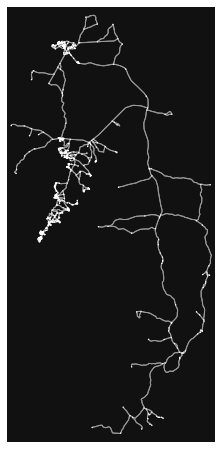

In [53]:
# Project Graphed Street Network to UTM 30
graph_proj_dambai = ox.project_graph(graph13)

# Transform graph to geodataframe
nodes_proj_dambai, edges_proj_dambai = ox.graph_to_gdfs(graph_proj_dambai, nodes=True, edges=True)
print("Coordinate system:", edges_proj_dambai.crs)

# Simplify and Consolidate Nodes in the Graphed Street Network
simplified_graph_dambai = ox.consolidate_intersections(graph_proj_dambai, tolerance=10, rebuild_graph=True)

# Plot
fig, ax = ox.plot_graph(simplified_graph_dambai, node_size=2)

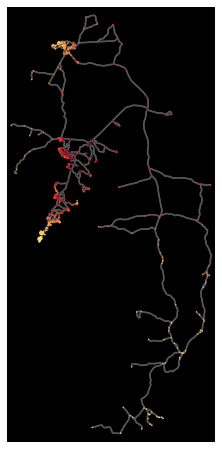

In [112]:
# node closeness centrality
node_centrality_dambai = nx.closeness_centrality(simplified_graph_dambai)

# plot 
df = pd.DataFrame(data=pd.Series(node_centrality_dambai).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='YlOrRd', start=0.2)
df = df.reindex(simplified_graph_dambai.nodes())
nc = df['colors'].tolist()

fp = "centralitydambai1.png"
fig, ax = ox.plot_graph(simplified_graph_dambai, bgcolor='k', node_size=2, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, save=True, filepath=fp, dpi=300)

Coordinate system: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


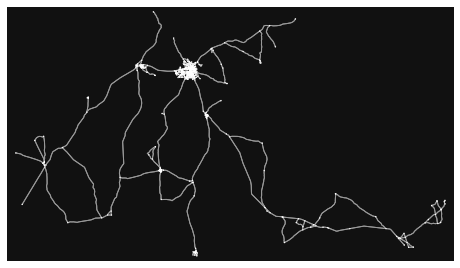

In [54]:
# Project Graphed Street Network to UTM 30
graph_proj_nalerigu = ox.project_graph(graph14)

# Transform graph to geodataframe
nodes_proj_nalerigu, edges_proj_nalerigu = ox.graph_to_gdfs(graph_proj_nalerigu, nodes=True, edges=True)
print("Coordinate system:", edges_proj_nalerigu.crs)

# Simplify and Consolidate Nodes in the Graphed Street Network
simplified_graph_nalerigu = ox.consolidate_intersections(graph_proj_nalerigu, tolerance=10, rebuild_graph=True)

# Plot
fig, ax = ox.plot_graph(simplified_graph_nalerigu, node_size=2)

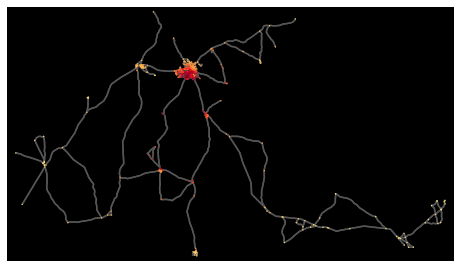

In [114]:
# node closeness centrality
node_centrality_nalerigu = nx.closeness_centrality(simplified_graph_nalerigu)

# plot 
df = pd.DataFrame(data=pd.Series(node_centrality_nalerigu).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='YlOrRd', start=0.2)
df = df.reindex(simplified_graph_nalerigu.nodes())
nc = df['colors'].tolist()

fp = "centralitynalerigu1.png"
fig, ax = ox.plot_graph(simplified_graph_nalerigu, bgcolor='k', node_size=2, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, save=True, filepath=fp, dpi=300)

Coordinate system: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


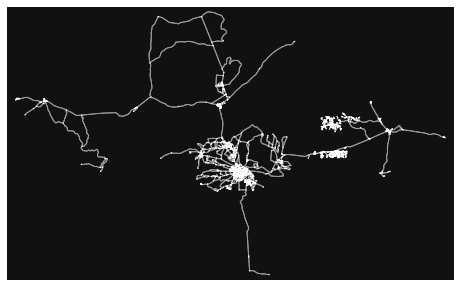

In [55]:
# Project Graphed Street Network to UTM 30
graph_proj_damongo = ox.project_graph(graph15)

# Transform graph to geodataframe
nodes_proj_damongo, edges_proj_damongo = ox.graph_to_gdfs(graph_proj_damongo, nodes=True, edges=True)
print("Coordinate system:", edges_proj_damongo.crs)

# Simplify and Consolidate Nodes in the Graphed Street Network
simplified_graph_damongo = ox.consolidate_intersections(graph_proj_damongo, tolerance=10, rebuild_graph=True)

# Plot
fig, ax = ox.plot_graph(simplified_graph_damongo, node_size=2)

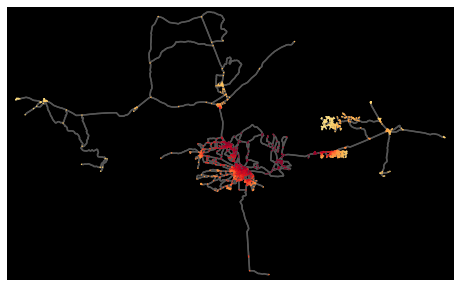

In [116]:
# node closeness centrality
node_centrality_damongo = nx.closeness_centrality(simplified_graph_damongo)

# plot 
df = pd.DataFrame(data=pd.Series(node_centrality_damongo).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='YlOrRd', start=0.2)
df = df.reindex(simplified_graph_damongo.nodes())
nc = df['colors'].tolist()

fp = "centralitydamongo1.png"
fig, ax = ox.plot_graph(simplified_graph_damongo, bgcolor='k', node_size=2, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, save=True, filepath=fp, dpi=300)

Coordinate system: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


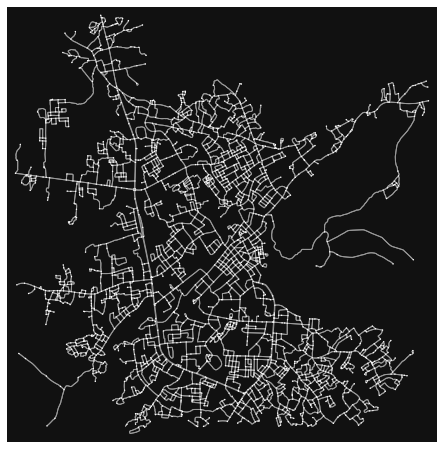

In [56]:
# Project Graphed Street Network to UTM 30
graph_proj_koftown = ox.project_graph(graph16)

# Transform graph to geodataframe
nodes_proj_koftown, edges_proj_koftown = ox.graph_to_gdfs(graph_proj_koftown, nodes=True, edges=True)
print("Coordinate system:", edges_proj_koftown.crs)

# Simplify and Consolidate Nodes in the Graphed Street Network
simplified_graph_koftown = ox.consolidate_intersections(graph_proj_koftown, tolerance=10, rebuild_graph=True)

# Plot
fig, ax = ox.plot_graph(simplified_graph_koftown, node_size=2)

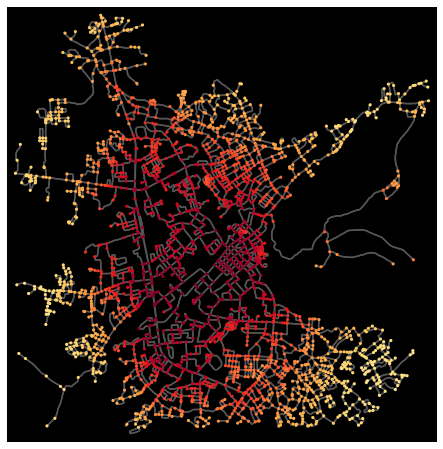

In [120]:
# node closeness centrality
node_centrality_koftown = nx.closeness_centrality(simplified_graph_koftown)

# plot 
df = pd.DataFrame(data=pd.Series(node_centrality_koftown).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='YlOrRd', start=0.2)
df = df.reindex(simplified_graph_koftown.nodes())
nc = df['colors'].tolist()

fp = "centralitykoftown1.png"
fig, ax = ox.plot_graph(simplified_graph_koftown, bgcolor='k', node_size=10, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1, save=True, filepath=fp, dpi=300)